[-0.09537933 -0.87099868]


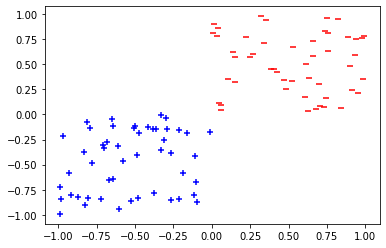

In [0]:
#Generate a 2D (𝒙𝑖 ∈ ℛ2) linear separable data set with 50 positive instances
#and 50 negative instances and create a scatter plot to visualize the data set.

import matplotlib.pyplot as plt
import numpy as np

r1 = np.random.uniform(low=-1, high=0, size=(50,2))
r2 = np.random.uniform(low=0, high=1, size=(50,2))
mix = np.concatenate((r1,r2))
np.random.shuffle(mix)
print(mix[1])

target_y = []

for i in range(len(mix)):
  if (mix[i,0]<0):
    plt.scatter(mix[i,0], mix[i,1], c='blue', marker='+')
    target_y.append(1)
  else:
    plt.scatter(mix[i,0], mix[i,1], c='red', marker='_')
    target_y.append(-1)
plt.show()

mix = np.insert(mix,0,1,axis = 1)

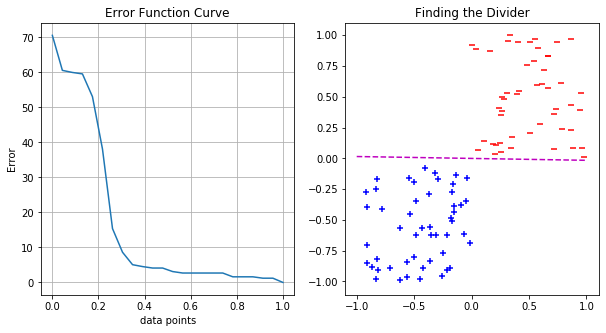

In [0]:
#Create the Batch Perceptron training algorithm and use the synthetic data set in a.(1) to train a Perceptron model. Plot the error function curve
#when the training process converges. Create a plot that shows the training instances and the learnt decision boundary.

w_old = np.random.rand(1,3)
w_new = np.zeros((1,3))
lr = .00001 #learning rate (step size)
gradNorm = float('inf')
grad = np.zeros((1,3))

def gradFunc(mix, w_new):
  gradSumError = np.zeros((1,3))
  for i in range(len(mix)):
    if (np.dot(w_new, mix[i]) * target_y[i] <= 0):
      gradSumError = gradSumError + np.dot(mix[i], target_y[i])
  return gradSumError #returns the batch gradient; hence batch gradient descent

errorFn = []
while (gradNorm > 0):
  grad = gradFunc(mix, w_new) #batch gradient assigned to grad variable
  gradNorm = np.linalg.norm(grad, 2) #norm 2
  errorFn.append(gradNorm)

  for j in range(len(mix)):
    w_new = w_old + lr*grad #gradient descent theorem
    w_old = w_new

final_x = []
for l in range(len(mix)):
  final_x.append(np.array([w_new[0][1]*mix[l,1], w_new[0][2]*mix[l,2]]))
final_x = np.array(final_x)
  
plt.figure(figsize=(10, 5))
plt.subplot(121)
x_axis = np.linspace(0,1,len(errorFn))
plt.xlabel('data points')
plt.ylabel('Error')
plt.title('Error Function Curve')
plt.grid(True)
plt.plot(x_axis, errorFn)

m = (final_x[6,1] - final_x[5,1]) / (final_x[6,0] - final_x[5,0])
x = np.linspace(-1,1,100)

plt.subplot(122)
plt.title('Finding the Divider')
plt.plot(x, (m*x)+final_x[5,1], '--m')

#plt.plot(final_x[5:7,0], final_x[5:7,1])
mix = np.delete(mix, 0, 1)
for i in range(len(mix)):
  if (mix[i,0]<0):
    plt.scatter(mix[i,0], mix[i,1], c='blue', marker='+')
  else:
    plt.scatter(mix[i,0], mix[i,1], c='red', marker='_')

plt.show()

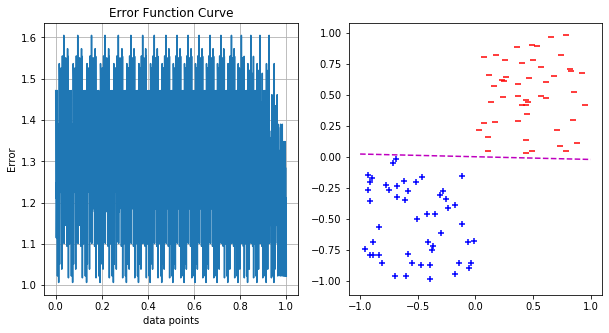

In [0]:
#Create the sequential Perceptron training algorithm and use the synthetic data set in a.(1) to train a Perceptron model. Plot the error function curve
#when the training process converges. Create a plot that shows the training instances and the resulting decision boundary.

r1 = np.random.uniform(low=-1, high=0, size=(50,2))
r2 = np.random.uniform(low=0, high=1, size=(50,2))
mix = np.concatenate((r1,r2))
np.random.shuffle(mix)

target_y = []
for i in range(len(mix)):
  if (mix[i,0]<0):
    target_y.append(1)
  else:
    target_y.append(-1)

mix = np.insert(mix,0,1,axis = 1)

w_old = np.random.rand(1,3)
w_new = np.zeros((1,3))
lr = .001 #learning rate (step size)
gradNorm = float('inf')
grad = np.zeros((1,3))

errorFn = []
k=0
miss = 0
while (miss != len(mix)):
  if ( np.dot(w_old, mix[k])*target_y[k] <= 0 ):  #condition for misclassification
    grad = np.dot(mix[k], target_y[k]) #gradient is x'*y
    gradNorm = np.linalg.norm(grad, 2)
    errorFn.append(gradNorm)
    #print(gradNorm)
    w_new = w_old + lr*grad #gradient descent theorem
    w_old = w_new
    miss = 0
  k = (k+1)%len(target_y)
  miss += 1

plt.figure(figsize=(10, 5))
plt.subplot(121)
x_axis = np.linspace(0,1,len(errorFn))
plt.xlabel('data points')
plt.ylabel('Error')
plt.title('Error Function Curve')
plt.grid(True)
plt.plot(x_axis, errorFn)

final_x = []
for l in range(len(mix)):
  final_x.append(np.array([w_new[0][1]*mix[l,1], w_new[0][2]*mix[l,2]]))
final_x = np.array(final_x)

m = (final_x[6,1] - final_x[5,1]) / (final_x[6,0] - final_x[5,0])
x = np.linspace(-1,1,100)
plt.subplot(122)
plt.plot(x, (m*x)+final_x[5,1], '--m')
#plt.plot(final_x[5:7,0], final_x[5:7,1])
mix = np.delete(mix, 0, 1)
for i in range(len(mix)):
  if (mix[i,0]<0):
    plt.scatter(mix[i,0], mix[i,1], c='blue', marker='+')
  else:
    plt.scatter(mix[i,0], mix[i,1], c='red', marker='_')
plt.show()

In [0]:
#Selecting the learning rate during the training process of calculating batch stochasic gradient and demonstrating 
#how the choice of the learning rate affects the convergence of the training process.

Increasing the learning rate more than .01 causes my perceptron algorithm to become unstable and go into an infinite loop. If the learning rate is too big, the gradient does not converge to 0 (steps are too big preventing the weights from finding an optimum set of coefficients)and therefore the weights will not converge.  A learning rate that is too small also causes instability by stopping too soon preventing the weights from converging.  

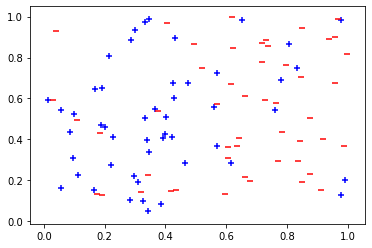

In [0]:
#Generating a 2D non-linearly separable data set with 50 positive instances and
#50 negative instances and create a scatter plot to visualize the data set.

r1 = np.random.rand(50,2)
r2 = np.random.rand(50,2)
mix = np.concatenate((r1,r2))
np.random.shuffle(mix)
x1 = []
x2 = []
for i in range(len(r1)):
  if((r1[i,0] < .5 and r1[i,1]> .5) or (r1[i,0] < .5 and r1[i,1]< .5)):
    x1.append(r1[i])
    x2.append(r2[i])
  else:
    x1.append(r2[i])
    x2.append(r1[i])

x1 = np.array(x1)
x2 = np.array(x2)
plt.scatter(x1[:,0], x1[:,1], c='blue', marker='+')
plt.scatter(x2[:,0], x2[:,1], c='red', marker='_')
target_y = []

for i in range(len(mix)):
  if (mix[i,0]<0):
    #plt.scatter(mix[i,0], mix[i,1], c='blue', marker='+')
    target_y.append(1)
  else:
    #plt.scatter(mix[i,0], mix[i,1], c='red', marker='_')
    target_y.append(-1)
plt.show()

0


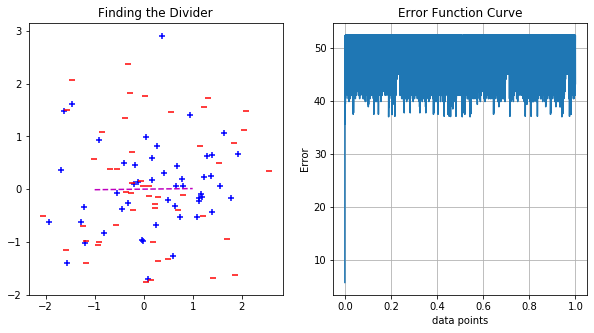

In [0]:
#Modifying the training algorithm in a.(2) to have a training algorithm that works
#on a nonseparable data set. Used the synthetic data set in b.(1) to test the algorithm.

import matplotlib.pyplot as plt
import numpy as np

r1 = np.random.randn(50,2)
r2 = np.random.randn(50,2)
mix = np.concatenate((r1,r2))
#np.random.shuffle(mix)

target_y = []
for i in range(len(mix)):
  #if (mix[i,0]<0):
  if (i <= 50):
    target_y.append(1)
  else:
    target_y.append(-1)

mix = np.insert(mix,0,1,axis = 1)

w_old = np.random.rand(1,3)
w_new = np.zeros((1,3))
lr = .00001 #learning rate (step size)
gradNorm = float('inf')
grad = np.zeros((1,3))

mistakes = 0
def gradFunc(mix, w_new):
  mistakes = 0
  gradSumError = np.zeros((1,3))
  for i in range(len(mix)):
    if (np.dot(w_new, mix[i]) * target_y[i] <= 0):
      mistakes += 1
      #print(mistakes)
      gradSumError = gradSumError + np.dot(mix[i], target_y[i])
  return gradSumError #returns the batch gradient; hence batch gradient descent

errorFn = []
cycles = 0
#while (gradNorm > 0): #will go into an infinite loop if I use this condition - gradient will never go to 0 in this case
while (cycles < 10000):
  grad = gradFunc(mix, w_new) #batch gradient assigned to grad variable
  gradNorm = np.linalg.norm(grad, 2)
  errorFn.append(gradNorm)

  for j in range(len(mix)):
    w_new = w_old + lr*grad #gradient descent theorem
    w_old = w_new
    #print(w_old)
  cycles += 1

final_x = []
for l in range(len(mix)):
  final_x.append(np.array([w_new[0][1]*mix[l,1], w_new[0][2]*mix[l,2]]))
final_x = np.array(final_x)

m = (final_x[6,1] - final_x[5,1]) / (final_x[6,0] - final_x[5,0])
x = np.linspace(-1,1,100)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Finding the Divider')
plt.scatter(r1[:,0], r1[:,1], c='blue', marker='+')
plt.scatter(r2[:,0], r2[:,1], c='red', marker='_')
plt.plot(x, (m*x)+final_x[5,1], '--m')

plt.subplot(122)
x_axis = np.linspace(0,1,len(errorFn))
plt.xlabel('data points')
plt.ylabel('Error')
plt.title('Error Function Curve')
plt.grid(True)
plt.plot(x_axis, errorFn)

print (mistakes)
plt.show()